In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pynbody.plot.sph as sph

In [2]:
filepth = 'Starting-Stuff/IsoB_1000/GLX.0'
timestep = (['1000'])

filenom = (filepth+timestep[0])
dno = timestep[0]
gal = pynbody.load(filenom) 
print (gal.dm)

t_now =  gal.properties['time'].in_units('Myr')
timestr = str( np.round(float(t_now),1) )

#Put CoM in middle
pynbody.analysis.angmom.faceon(gal)

<FamilySubSnap "Starting-Stuff\IsoB_1000\GLX.01000::dm" len=1000000>


<Transformation faceon>

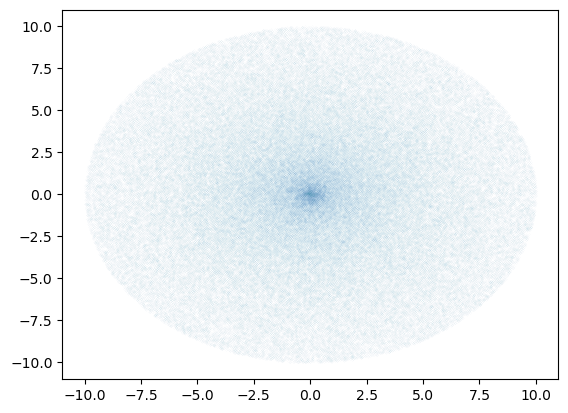

In [ ]:
x = gal.dm['x']
y = gal.dm['y']

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

plt.plot(x, y, marker='.', linestyle='None', markersize=0.1, alpha=0.2)
#plt.gca().invert_xaxis()


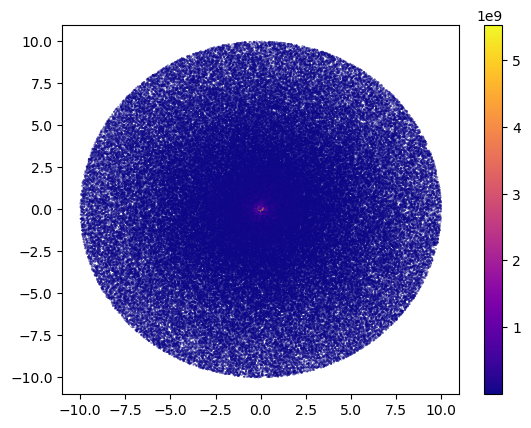

In [25]:
conc = gal.dm["rho"]
conc = conc[mask]
plt.clf()
plt.scatter(x, y, c=conc, cmap='plasma', s=0.05)#, alpha=0.05)
plt.colorbar()

<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:4: SyntaxWarning: invalid escape sequence '\;'
<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:4: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_22984\4089800708.py:3: SyntaxWarning: invalid escape sequence '\;'
  plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_22984\4089800708.py:4: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)


Text(0, 0.5, '$y \\;{\\rm [kpc]}$')

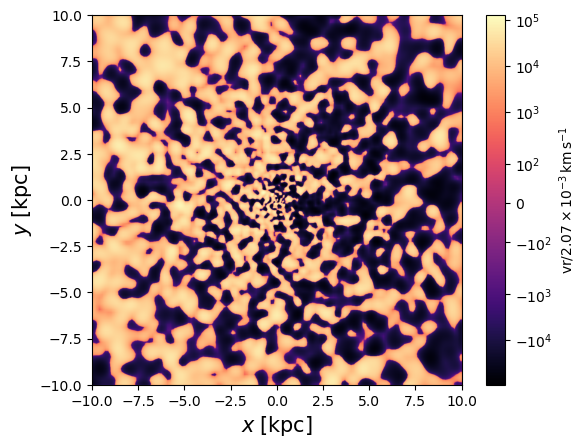

In [13]:
plt.clf()
sph.image(gal.dm,qty='vr',width='20 kpc',cmap='magma',show_cbar = True, resolution=1000)
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

In [54]:
res = 5000

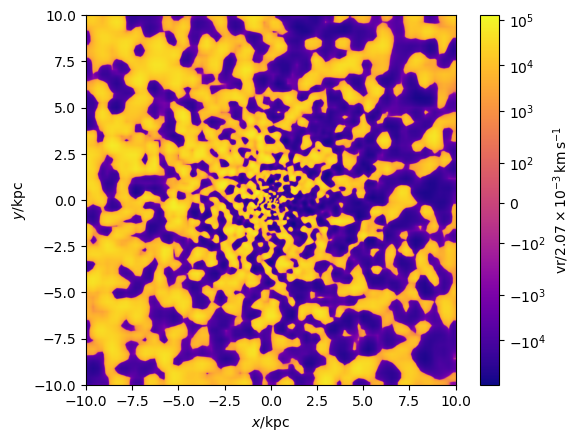

In [138]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

dm=sph.image(gal.dm,qty='vr',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

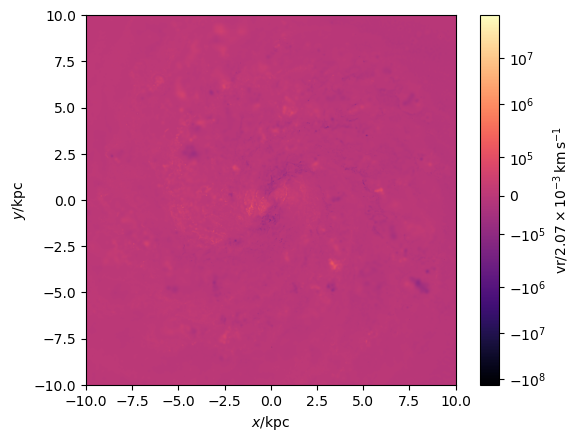

In [139]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

gas=sph.image(gal.gas,qty='vr',width='20 kpc',cmap='magma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

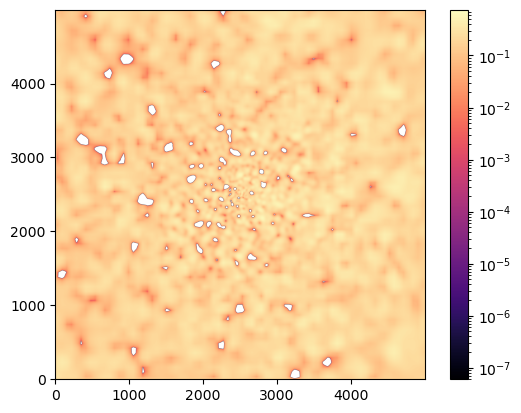

In [140]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n - 0.5

relation = norm(gas) - norm(dm)
plt.clf()
plt.imshow(relation, origin='lower', cmap='magma', norm=colors.LogNorm())
plt.colorbar()

1. Run spiral structure/flocculency code on both gas/star and relation -> see if it changes anything
2. If they are both similar, i.e return same clusters then dark matter doesn't affect spiral structure? But it could also be that dark matter affects spiral structure -> more defined spiral arms?

In [145]:
norm(gas)

SimArray([[0.10860962, 0.10861063, 0.10861164, ..., 0.10859364,
           0.10859543, 0.10859704],
          [0.10861063, 0.10861182, 0.10861313, ..., 0.10859114,
           0.10859323, 0.10859543],
          [0.10861164, 0.10861313, 0.10861468, ..., 0.1085887 ,
           0.10859114, 0.10859364],
          ...,
          [0.10860556, 0.10860568, 0.1086058 , ..., 0.10857123,
           0.10857636, 0.1085816 ],
          [0.10860538, 0.10860556, 0.10860568, ..., 0.10857636,
           0.10858077, 0.10858512],
          [0.10860533, 0.10860538, 0.10860556, ..., 0.1085816 ,
           0.10858512, 0.10858876]], shape=(5000, 5000), dtype=float32, '2.07e-03 km s**-1')

In [143]:
x = gal.dm['x']
y = gal.dm['y']
conc = gal.dm["rho"]

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

conc = conc[mask]

dm = np.column_stack((x, y, conc))
dm

array([[-4.41086266e+00, -1.08376513e-01,  1.44193210e+07],
       [-8.59051322e+00,  2.09169753e-01,  3.09703137e+06],
       [-1.08055011e+00, -2.21701422e+00,  5.80537620e+07],
       ...,
       [-6.03215053e+00, -6.46620628e+00,  6.29520911e+06],
       [ 3.62391778e+00, -1.89156683e-01,  4.03321584e+07],
       [ 5.40092820e+00,  1.51070966e+00,  3.62331603e+06]],
      shape=(173804, 3))

In [15]:
x = gal.gas['x']
y = gal.gas['y']
conc = gal.gas["rho"]

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

conc = conc[mask]

gas = np.column_stack((x, y, conc))
gas

array([[ 1.00809246e-02,  2.23516273e-02,  8.73809183e+10],
       [-1.62201927e+00,  2.03096163e+00,  7.17291776e+08],
       [ 5.76246398e+00,  6.56672026e+00,  8.53740500e+06],
       ...,
       [-6.40892315e+00,  3.84325200e+00,  6.99053000e+05],
       [-2.09455782e-01, -1.27920717e+00,  1.91083100e+07],
       [-5.28091605e-01, -4.02778437e-01,  1.56917170e+07]],
      shape=(1762234, 3))

In [16]:
def norm(arr, n):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

def bin(arr, bins):
    #arr = norm(arr, 60)
    norm = plt.hist(arr, bins=bins)[0]
    return norm

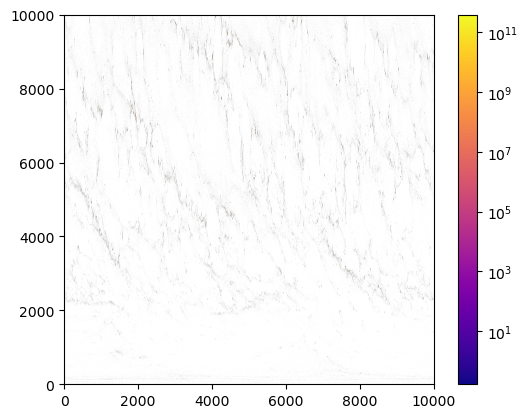

In [24]:
from matplotlib import colors

res = 10000
new_x = norm(phi, res) #(phi + 90) / 2 #bin(phi, 60)
new_y= norm(rho, res) #bin(np.log10(rho), 60)

x_range = int(np.max(new_x) - np.min(new_y)) + 1
y_range = int(np.max(new_x)- np.min(new_y)) + 1

xint = np.rint(new_x).astype(int)
yint = np.rint(new_y).astype(int)
im4 = np.zeros((x_range, y_range))
counts = np.zeros((x_range, y_range))

mask = conc != 0

np.add.at(im4, (yint[mask], xint[mask]), conc[mask])
np.add.at(counts, (yint[mask], xint[mask]), 1)

im4[counts != 0] = im4[counts != 0] / counts[counts != 0]
plt.clf()
plt.imshow(im4, origin='lower', cmap='plasma', norm=colors.LogNorm())
plt.colorbar()